<a href="https://colab.research.google.com/github/Re-venger/Machine-Learning-tutorials/blob/main/missing_values_handle_CCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('data_science_job.csv')

In [22]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [23]:
# find out how much percent values of the data are missing
# focus only on the data where no null or very small null values
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [24]:
print("Current dimension of df: ", df.shape)

Current dimension of df:  (19158, 13)


In [25]:
# do cca on the cols where the missing value % is less than 5%
cols = [cols for cols in df.columns if df[cols].isnull().mean() < 0.05 and df[cols].isnull().mean() > 0 ]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [26]:
# estimate of how much data will be left after removing the missing data
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [27]:
new_df = df[cols].dropna()
print(f'Olddimension of df: {df.shape}\nNewdimension of df: {new_df.shape}')

Olddimension of df: (19158, 13)
Newdimension of df: (17182, 5)


### Ploting to check how much effect has been made

In [28]:
# if cca is done on numerical data then plot histogram on previous and
# new data and if both distributions are comparable then its good

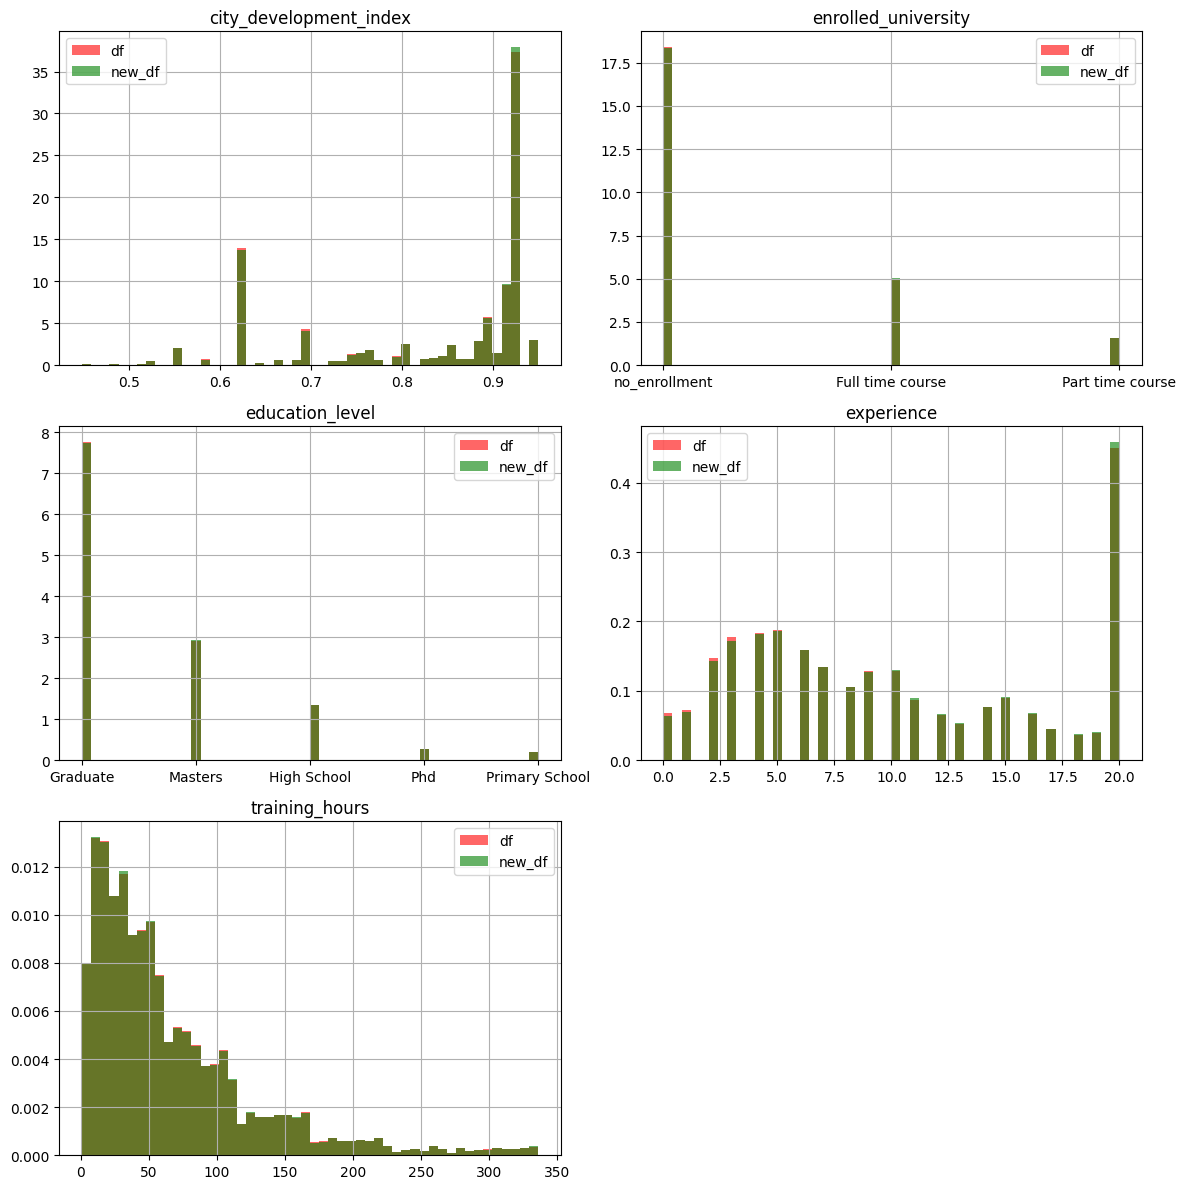

In [42]:
# number of columns
n = len(cols)

# figure with 2 plots per row
fig, axes = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(12, 4 * ((n + 1) // 2)))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(cols):
    ax = axes[i]
    ax.set_title(col)
    df[col].hist(bins=50, ax=ax, density=True, color="red", alpha=0.6, label="df")
    new_df[col].hist(bins=50, ax=ax, density=True, color="green", alpha=0.6, label="new_df")
    ax.legend()

# hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [49]:
temp = pd.concat([
    df['training_hours'].value_counts() / len(df),
    new_df['training_hours'].value_counts() / len(new_df),
], axis=1)
temp.columns = ['Original', 'CCA']
temp

,Original,CCA
training_hours,,
28.0,0.016703,0.017809
18.0,0.014563,0.015074
12.0,0.014563,0.014958
22.0,0.014250,0.015074
50.0,0.014041,0.014841
...,...,...
240.0,0.000261,0.000291
234.0,0.000261,0.000233
272.0,0.000261,0.000233
